In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [4]:
df = pd.read_csv("School Data - Baramati.csv")

In [5]:
df.head()

,S No,School Name,Establishment,Region,Pre-primary section (Y/N),Classes,medium of instructions,Management,Cluster
0,1,Anad Vid Hol,1978.0,Rural,No,5 to 12,Marathi,Pvt.Aided,Athphata
1,2,Anand Eng Med Public school,2013.0,Rural,Yes,1 to 3,English,Pvt.Unaided,Athphata
2,3,Anandnagar,2005.0,Rural,No,1 to 4,Marathi,Local Body,Athphata
3,4,New English School Pandharwasti,1989.0,Rural,No,5 to 10,Marathi,Pvt.Aided,Athphata
4,5,Zpps Aathphata,1948.0,Rural,No,1 to 4,Marathi,Local Body,Athphata


In [6]:
df.tail()

,S No,School Name,Establishment,Region,Pre-primary section (Y/N),Classes,medium of instructions,Management,Cluster
408,409,ZPPS THOMBAREWADI,1999.0,Rural,N,5 to 4,Marathi,Local Body,Wadgaon Nimbalkar
409,410,ZPPS THOMBAREWADI NO.2,2010.0,Rural,N,6 to 4,Marathi,Local Body,Wadgaon Nimbalkar
410,411,ZPPS WABALEWASTI,2000.0,Rural,N,7 to 4,Marathi,Local Body,Wadgaon Nimbalkar
411,412,ZPPS WADGAON NIMBALKAR NO1,1823.0,Rural,N,8 to 4,Marathi,Local Body,Wadgaon Nimbalkar
412,413,ZPPS WADGAON NIMBALKAR NO2,1927.0,Rural,N,9 to 4,Marathi,Local Body,Wadgaon Nimbalkar


In [8]:
df.isnull().sum()

S No                         0
School Name                  0
Establishment                6
Region                       6
Pre-primary section (Y/N)    6
Classes                      6
medium of instructions       6
Management                   6
Cluster                      6
dtype: int64

In [11]:
df.dropna(inplace = True)

In [12]:
df.isnull().sum()

S No                         0
School Name                  0
Establishment                0
Region                       0
Pre-primary section (Y/N)    0
Classes                      0
medium of instructions       0
Management                   0
Cluster                      0
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label_encoders = {}
for col in ['Region', 'Classes', 'medium of instructions', 'Management', 'Cluster', 'Pre-primary section (Y/N)']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [16]:
X = df[['Establishment', 'Region', 'Classes', 'medium of instructions', 'Management', 'Cluster']]
y = df['Pre-primary section (Y/N)']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

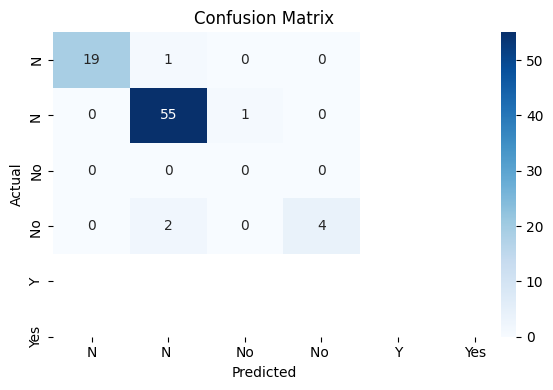

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoders['Pre-primary section (Y/N)'].classes_,
            yticklabels=label_encoders['Pre-primary section (Y/N)'].classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [25]:
decoded_preds = label_encoders['Pre-primary section (Y/N)'].inverse_transform(y_pred[:10])
decoded_actuals = label_encoders['Pre-primary section (Y/N)'].inverse_transform(y_test[:10])

In [26]:
prediction_results = pd.DataFrame({
    'School Index': y_test.index[:10],
    'Actual': decoded_actuals,
    'Predicted': decoded_preds
})

In [ ]:
print("Sample Prediction Results:\n")
print(prediction_results)

Sample Prediction Results:

   School Index Actual Predicted
0            70     No        No
1           218     No        No
2           258     No        No
3            33     No        No
4            42     No        No
5            77     No        No
6           137     No        No
7           340      N         N
8           245     No        No
9           266     No        No


In [24]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           2       0.95      0.98      0.96        56
           3       0.00      0.00      0.00         0
           5       1.00      0.67      0.80         6

    accuracy                           0.95        82
   macro avg       0.74      0.65      0.68        82
weighted avg       0.96      0.95      0.96        82



c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i